# Chapter 10: Introduction to Artificial Neural Networks.

This from the Hands on Machine Learning with Scikit Learn and Tensorflow book by Aurelien Geron.

This notebook will be how to build and test an Image Classifier and a Regressor using an Artificial Neural Network and the data set to be used, will be the Fashion MNIST dataset. The framework used to build the NN will be Tensorflow.Keras

In [1]:
# Import Dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Siya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [ ]:
tf.__version__ 

# Classification

In [2]:
# Load Dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

### We need to know the structure of the data.

- The total dataset has 70 000 instances
- The training set has 60 000 instances, while the test set has 10 000 instances.
- The images are (28,28) 2D arrays of gray-scale images, with pixels values ranging between 0(White) to 255(Black).

In [ ]:
# Training Set Instance size and Shape
print("Training Set Instances: ", len(X_train_full))
print("Training Set Instances: ", len(y_train_full))
print("Training Set Shape: ", X_train_full.shape)
print("Training Set Shape: ", y_train_full.shape)

In [ ]:
# Test Set Instance size and Shape
print("Test Set Instances: ", len(X_test))
print("Test Set Instances: ", len(y_test))
print("Test Set Shape: ", X_test.shape)
print("Test Set Shape: ", y_test.shape)

Great, so we have our training and test sets. However, we need our validation set. We will get it from the training set. And use 5000 instances as our validation set

In [3]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 # We are dividing by 255.0 to scale our pixel values to a range between 0-1and make them floats
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
print(y_train[0])
plt.imshow(X_train[0])

In [ ]:
# Lets show an image from every class and together with its label:
fig = plt.figure(figsize = (15,15))

for i in range(0, 50, 1):
    ax =fig.add_subplot(10, 5, i+1)
    image = plt.imshow(X_train[i])
    ax.set_title(y_train[i])

fig.subplots_adjust(hspace=0.6)

In [4]:
# Now we need a list of all the categories we will be dealing with. We can deduce this from the plot above and also from
# The following link: https://towardsdatascience.com/multi-label-classification-and-class-activation-map-on-fashion-mnist-1454f09f5925


class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
for i in range(10):
    print(class_names[y_train[i]])

In [ ]:
fig = plt.figure(figsize = (15, 15))

for i in range(0, 10, 1):
    ax = fig.add_subplot(2, 5, i+1)
    image = plt.imshow(X_train[i])
    ax.set_title(class_names[y_train[i]])
    
fig.subplots_adjust(hspace = -0.7)

### Now we can build the Neural Network

We will build the Neural Network, by adding the layers Sequentiallm, by using the Sequential class from the keras api
We will use 1 Flattening Layer as our input layer
We will use 2 Hidden Dense layers and  Dense Output later

In [5]:
model = Sequential()
model.add(Flatten(input_shape = [28,28])) #Input Layer
model.add(Dense(units = 300, activation = "relu")) # First Hidden Layer
model.add(Dense(units = 150, activation = "relu")) # Second Hidden Layer
model.add(Dense(units = 75, activation ="relu")) # Third Hidden Layer
model.add(Dense(units = 10, activation = "softmax")) # Output Layer 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_2 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                760       
Total params: 292,735
Trainable params: 292,735
Non-trainable params: 0
_________________________________________________________________


## Now we compile the network

Now that we have created the model architecture, we can compile it, by call the `compile()`method.
The method takes three arguments:
1. loss function, which will be the `sparse_cateorical_crossentropy`
2. optimizer, which can be `SGD` or `Adam`. The Keras API has more optimizers
3. metrics, which is `accuracy`, again, for more metrics, one can review the Keras API docs.

In [6]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Now lets train the network

To train the model, one can call the `fit()` method.
The function takes a couple of arguments, which are stipulated in the documentation on Keras API.

However, for this notebook, we will the following arguments:

1. X_train: Feature_Matrix with the pixel values for each instance(picture)
2. y_train: The target labels vector.
3. epochs: The number of epochs the model will be trained on.
4. validation_data = (X_valid, y_valid), the validation sets

In [7]:
# Note: Always create an object, when traning the model to get some very valuable information, wwe will discuss later

history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 13s 235us/sample - loss: 0.4929 - accuracy: 0.8206 - val_loss: 0.3997 - val_accuracy: 0.8534
Epoch 2/30
55000/55000 [==============================] - 9s 165us/sample - loss: 0.3721 - accuracy: 0.8633 - val_loss: 0.3475 - val_accuracy: 0.8766
Epoch 3/30
55000/55000 [==============================] - 9s 170us/sample - loss: 0.3355 - accuracy: 0.8758 - val_loss: 0.3345 - val_accuracy: 0.8768
Epoch 4/30
55000/55000 [==============================] - 9s 168us/sample - loss: 0.3106 - accuracy: 0.8842 - val_loss: 0.3223 - val_accuracy: 0.8798
Epoch 5/30
55000/55000 [==============================] - 9s 165us/sample - loss: 0.2923 - accuracy: 0.8901 - val_loss: 0.3029 - val_accuracy: 0.8856
Epoch 6/30
55000/55000 [==============================] - 9s 166us/sample - loss: 0.2764 - accuracy: 0.8959 - val_loss: 0.3159 - val_accuracy: 0.8806
Epoch 7/30
55000/55000 [==========================

In [ ]:
# Training Parameters:
history.params

#### About the History Object:

The history object returns the following:

1. Training Paramters(Weight Connectionsfor each layer) by calling: `history.params`
2. A list of the epochs by calling: `history.epoch`
3. A dictionary containing the loss and extra metrics measured at the end of each epoch on the training and validation set, by calling `history.history`

Note: The dictionary can be converted to a dataframe and then plotted to get the learning curves of the models. (We can view how the model performs oer the epoch range.


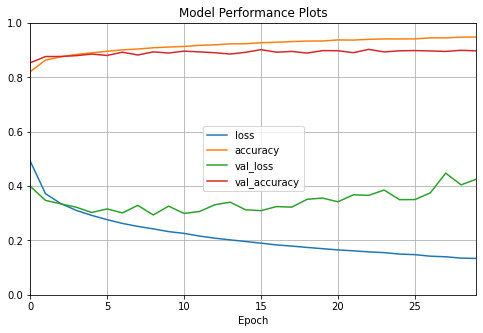

In [8]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model Performance Plots")
plt.xlabel("Epoch")
plt.show()

From the performance plot, we can see that the model is overfitted. The validation loss is waay higher than the training loss. Secondly,the validation accuracy has plateued around 89%. So we cn try a different optimizer, such as Stochastic Gradient Descent, with a default learning rate of 0.01.

#### Notes about Performance:

If you are not satisfied with the performance of the model, there are a couple of things you can do:

1. Add more epochs or call the .fit() method again.
2. Tune the hyperparameters:
    a. Change the learning rate
    b. Try a different optimizer
3. Tune the model hyperparameters:
    a. Change the no of layers
    b. Change the no of neurons per layer
    c. Change the type of activation functions used in layers.

Once satisfied with the performance, we can evaulate the model, which is next step.

## Evaulate the model:

Once satisfied with the model performance,we can evaluate the model on the test sets by calling the `evaluate()` method, with inputs being X_test and y_test.

Also Note: It might be a good idea to set aside a small section of X_test and y_test to use for predictions.

This small X_test section will be the input to the `predict()` method, and the predictions will be compared to the small section of the y_test. and see how well our model did, on data it has not seen before.

In [ ]:
# Get a small section from the test set
X_new, X_test_1 = X_test[:10], X_test[10:]
y_compare, y_test_1 = y_test[:10], y_test[10:]

#Evaulate the model on the test
model.evaluate(X_test_1, y_test_1)

In [ ]:
# Make some Predictions

predictions = model.predict(X_new)
predictions.round(3)

In [ ]:
prediction_class = model.predict_classes(X_new)
np.array(class_names)[prediction_class]

In [ ]:
y_compare

In [ ]:
np.array(class_names)[y_compare]

# Regression

For this part of the notebook, we will build a regressor using the Sequential() API and train and evaluate it on the California Housing Data. I will downloaded the housing data already, when I went through Chapter 2.We will recreate the transformations and there will be no EDA.

In [ ]:
# load data

housing_data = pd.read_csv("housing.csv")

In [ ]:
housing_data.head()

In [ ]:
housing_data.info()

In [ ]:
# Split the data into training and test set. We will use the train_test_split class for this notebook
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing_data, test_size = 0.2)

In [ ]:
# Get the Feature Matrix and Target vector

feature_matrix = housing_train.drop("median_house_value", axis = 1)
target_vector = housing_train["median_house_value"]
target_vector = target_vector/100000.0

In [ ]:
feature_matrix_train, feature_matrix_valid, target_vector_train, target_vector_valid = train_test_split(feature_matrix, target_vector)

In [ ]:
feature_matrix_train.shape

In [ ]:
feature_matrix_valid.shape

In [ ]:
target_vector_train.shape

In [ ]:
target_vector_valid.shape

In [ ]:
# Create a pipeline to do all the transformations:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

# Create a pipeline to do numerical transformations
num_pipeline = Pipeline(
    [("imputer", SimpleImputer(strategy = "median")), 
     ("norm", Normalizer())])

# Create a Column Transformer to encode categorical data
num_features = feature_matrix.drop("ocean_proximity", axis = 1) # Get the numerical features only
num_attr = list(num_features) # Get the names of the numerical features 

cat_attr = ["ocean_proximity"] # Get the names of the Ocean_Proximity categories

# Column Transformer, takes a list of dictionaries as an input
#Dictionary Structure: {name, transformer, columns}
# Since we are using a pipeline, its better to get the column names for the columns key
# Recall, we will use the pipeline to fit and transform the data

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr), 
    ("cat", OneHotEncoder(), cat_attr)
                                  ])

In [ ]:
feature_matrix_valid,feature_matrix_train = full_pipeline.fit_transform(feature_matrix_valid), full_pipeline.fit_transform(feature_matrix_train)

In [ ]:
feature_matrix_train.shape

In [ ]:
feature_matrix_train

In [ ]:
feature_matrix_valid.shape

In [ ]:
target_vector_train.shape

In [ ]:
target_vector_valid.shape

In [ ]:
Input_shape = feature_matrix_train.shape[1:] # Just get the number of features as our input shape.

In [ ]:
Input_shape

In [ ]:
# Now that the transformations, we can build the NN structurer

regressor = Sequential()
regressor.add(Dense(units = 30, activation = 'relu', input_shape = Input_shape)) # 1 Hidden Layer with 30 neurons
regressor.add(Dense(units = 1)) # One output neuron, since we just want to predict the median house value
regressor.summary()

In [ ]:
# Compile the model

regressor.compile(loss = "mean_absolute_error", optimizer = "sgd")

In [ ]:
# Train the regressor

history_1 = regressor.fit(feature_matrix_train, target_vector_train, epochs = 50, validation_data = (feature_matrix_valid, target_vector_valid))

In [ ]:
history_1.history

In [ ]:
pd.DataFrame(history_1.history).plot(figsize = (8,5))
plt.grid(True)

plt.title("Model Performance Plots")
plt.xlabel("Epoch")
plt.show()

# Building Complex Models using Functional API

Unitl now, we have using the Sequential() API to build our NNs. However, this is rather limiting as we cannot build complex models of differet architctures. One way to do this is is to use the Functional API, instead of the Sequential API. Lets find out how it works below:


### 1. Wide & Deep NN Architecture

This topology has two paths. A deep path and a wide path. The deep path is used so that the NN can learn deep patterns in the data, and the wide path is for the simple rules in the data. 

This inhibits the simple rules in the data from being distorted, as is usually the case, when Sequential API is used, since layers are sequentially stacked, and data flows in 1 direction. The topology is shown below:

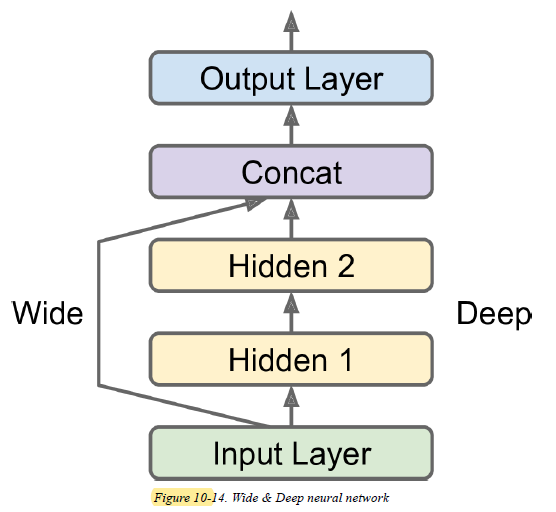

In [ ]:
housing = pd.read_csv("housing.csv")
housing = housing.drop("ocean_proximity", axis = 1)
housing.head()

In [ ]:
housing.info()

In [ ]:
feature_matrix = housing.drop("median_house_value", axis = 1)
target_vector = housing["median_house_value"]
target_vector = target_vector/100000.0

In [ ]:
feature_matrix.columns

##### sns.distplot(target_vector)


In [ ]:
# Lets split the data and do some transformations
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(
feature_matrix, target_vector)
# Get the validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

from sklearn.preprocessing import StandardScaler
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import Normalizer

#Impute Missing Values
imputer = SimpleImputer(strategy = "mean")
X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)
X_test = imputer.transform(X_test)

# Scale the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
Input_shape = X_train.shape[1:]

In [ ]:
print(X_valid.shape[1:])

In [ ]:
print(X_test.shape[1:])

In [ ]:
Input_shape

In [ ]:
# Lets build the model
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Input

input_ = Input(shape = Input_shape) # Input Layer
hidden_1 = Dense(units = 60, activation = 'relu')(input_)# Pass the input layer output through our first hidden layer
hidden_2 = Dense(units = 30, activation = "relu")(hidden_1)
concat = Concatenate()([input_, hidden_2])# Pass the hidden_1 layer output through our second hidden layer
output = Dense(units = 1)(concat)

model = Model(inputs = input_, outputs = output)
model.summary()

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(loss = "mse", optimizer = SGD(lr = 1e-3))

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_valid))

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.title("Regression Wide & Deep Model Performance Plot")
plt.xlabel("Epochs")
plt.show()

In [ ]:
### Lets evaluate our new model:
X_new, X_test_new = X_test[:5], X_test[5:]
y_new, y_test_new = y_test[:5], y_test[5:]
model.evaluate(X_test_new, y_test_new)

In [ ]:
predictions_reg = model.predict(X_new)
print(predictions_reg*100000)
print(y_new*100000)

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_train_full_1, X_test_1, y_train_full_1, y_test_1 = train_test_split(
housing.data, housing.target)
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(
X_train_full_1, y_train_full_1)

In [ ]:
housing.data.shape

In [ ]:
sns.distplot(housing.target)

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_train_full_1, X_test_1, y_train_full_1, y_test_1 = train_test_split(
housing.data, housing.target)
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(
X_train_full_1, y_train_full_1)
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_valid_1 = scaler.transform(X_valid_1)
X_test_1 = scaler.transform(X_test_1)

In [ ]:
X_train_1

In [ ]:
y_train_1

In [ ]:
input_1 = Input(shape = X_train_1.shape[1:]) # Input Layer
hidden_1 = Dense(units = 60, activation = 'relu')(input_1)# Pass the input layer output through our first hidden layer
hidden_2 = Dense(units = 30, activation = "relu")(hidden_1)
concat = Concatenate()([input_1, hidden_2])# Pass the hidden_1 layer output through our second hidden layer
output = Dense(units = 1)(concat)

model_2 = Model(inputs = input_1, outputs = output)
model_2.summary()

In [ ]:
model_2.compile(loss = "mse", optimizer = SGD(lr = 1e-3))

In [ ]:
history_2 = model_2.fit(X_train_1, y_train_1, epochs = 50, validation_data = (X_valid_1, y_valid_1))

In [ ]:
pd.DataFrame(history_2.history).plot(figsize = (8,5))
plt.grid(True)
plt.xlabel("Epochs")
plt.show()

### 2. Wide & Deep NN Architecture with 2 inputs

Will try to incorparate two inputs now, within our NN architecture. The resulting topology is shown below:
We will use 5 features for Input_A (0-4) (Wide Path) and 6 features for Input_B (Deep Path)

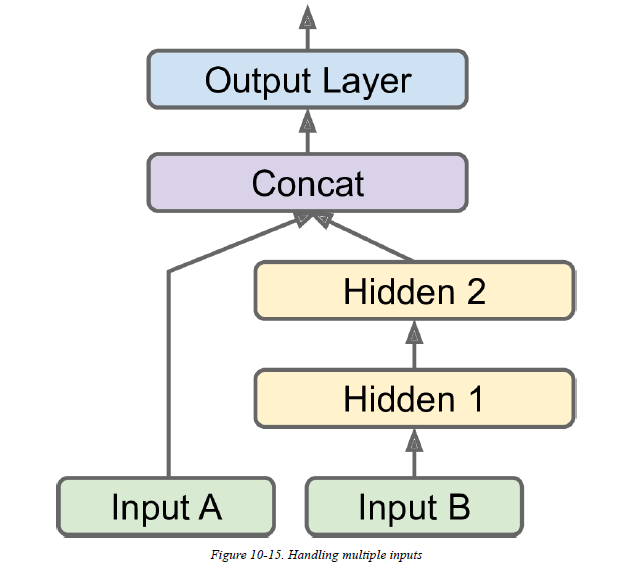

In [ ]:
# Since we are implementing this topology, we need to make sure that we get the relevant training inputs to fed into the network

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

In [ ]:
# Model Architecture

input_A =Input(shape = X_train_A.shape[1:]) #Input Layer B
input_B =Input(shape = X_train_B.shape[1:]) # Input Layer B
hidden_1 = Dense(units = 60, activation = 'relu')(input_B) #Hidden Layer 1
hidden_2 = Dense(units = 30, activation = 'relu')(hidden_1) #Hidden Layer 1
concat = Concatenate()([input_A, hidden_2]) #Concatenation Layer 
output = Dense(units = 1)(concat) # Output Layer
model_2_inputs = Model(inputs = [input_A, input_B], outputs = output)
model_2_inputs.summary()

In [ ]:
# Compile the model
model_2_inputs.compile(loss = 'mse', optimizer = SGD(lr = 1e-3))

In [ ]:
# Train model
history_2_inputs = model_2_inputs.fit((X_train_A, X_train_B), y_train, epochs = 50, validation_data = ((X_valid_A, X_valid_B), y_valid))

In [ ]:
pd.DataFrame(history_2_inputs.history).plot(figsize = (8,5))
plt.grid(True)
plt.xlabel("Epochs")
plt.title("2 Input W&D NN Performance Plots")
plt.show()

In [ ]:
# Evaluate the model:
X_test_A_new, X_new_A = X_test_A[5:], X_test_A[:5]
X_test_B_new, X_new_B = X_test_B[5:], X_test_B[:5]
y_new, y_test_new = y_test[:5], y_test[5:]

model_2_inputs.evaluate((X_test_A_new,X_test_B_new ), y_test_new)

In [ ]:
# Lets make some predictions

predictions_2_inputs = model_2_inputs.predict((X_new_A, X_new_B))

print(predictions_2_inputs*100000)
print(y_new*100000)

### 3. Wide & Deep NN Architecture with 2 inputs and 2 outputs

We can also use 2 outputs, the use cases are highlighted in the book, however for our uses, we will use it as a regularization technique, where we have 1 main output and an auxilary output(Use for regularization)

We will incorparate, loss_weights, when we compile the model


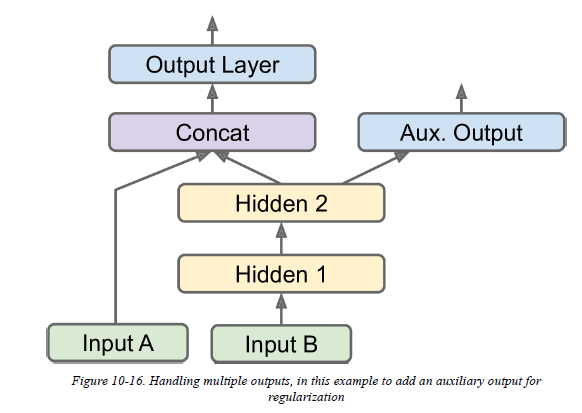


In [ ]:
input_A =Input(shape = X_train_A.shape[1:], name = "Wide_Path") #Input Layer B
input_B =Input(shape = X_train_B.shape[1:], name = "Deep_Path") # Input Layer B
hidden_1 = Dense(units = 60, activation = 'relu')(input_B) #Hidden Layer 1
hidden_2 = Dense(units = 30, activation = 'relu')(hidden_1) #Hidden Layer 1
concat = Concatenate()([input_A, hidden_2]) #Concatenation Layer 
aux_output = Dense(units = 1, name = "Auxilary_Output")(hidden_2)
output = Dense(units = 1, name = "Main_Output")(concat) # Output Layer
model_4 = Model(inputs = [input_A, input_B], outputs = [output, aux_output])
model_4.summary()

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import SGD
model_4.compile(loss = 'mse', loss_weights = [0.9, 0.1],  optimizer = SGD(lr = 1e-3)) # Give the Main Path larger weights

In [ ]:
# Train the model
history_4 = model_4.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=50,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

In [ ]:
pd.DataFrame(history_4.history).plot(figsize = (8,5))
plt.grid(True)
plt.xlabel("Epochs")
plt.title("2 Input and 2 outputs W&D NN Performance Plots")
plt.show()

In [ ]:
X_test_A_new, X_new_A = X_test_A[5:], X_test_A[:5]
X_test_B_new, X_new_B = X_test_B[5:], X_test_B[:5]
y_new, y_test_new = y_test[:5], y_test[5:]

total_loss, main_loss, aux_loss = model_4.evaluate([X_test_A_new,X_test_B_new], [y_test_new, y_test_new])

In [ ]:
# Lets make some predictions

y_pred_main, y_pred_aux = model_4.predict([X_new_A, X_new_B])

print(y_pred_main*100000)
print(y_new*100000)

In [ ]:
# Auxilary Predictions
print( y_pred_aux*100000)

##  How to save a trained model

We use 3 ways to save a model.

1. We can use the `save(name_of_model.h5)` method to save the model, which will save the parameters for each layer.
   The `load_model(name_of_model.h5)` mothod to load the model and use it.
   
   
2. We can use Callbacks to save checkpoints during training. The `fit()` method takes a callback argument, which is a list of  
   objects.
   
   a.) So first isto create an object of the ModelCheckpoint class, and specify `save_best_only = True`, to use the validation set to save the best model.
   b.) The ModelCheckpoint class is from the callbacks module in the Keras API
   
   
3. We can also use the EarlyStopping class to stop training after a certain nnumber of epochs, if there is no improvement in the validation loss

In [ ]:
# Lets save the model

from tensorflow.keras.models import load_model

model_4.save("complex_model.h5") # saving the model

In [ ]:
model_4 = load_model("complex_model.h5") # Load the model

In [ ]:
# Callbacks Section

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

modelcheckpoints = ModelCheckpoint("complex_model.h5", save_best_only = True)

# We have to call the ft method again to save checkpoints

history_4 = model_4.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=50,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), callbacks = [modelcheckpoints])

# Tuning Hyperparamters

One of the drawbacks of NNs, is their flexibility, since one can build any imaginable archetetcure, and a simple MLP can have any number of layers or number of neutrons.

One way to fine tune hyperparameters of a NN is to use GridSearchCV or RandomizedSearchCV. RandomizedSearchCV is usually preferred over GridSearchCV.

We do the above, by wrapping the Keras model so that it mimics a Scikit Learn regressor.


1. First you build a function, that will build and compile the model, it can be using the `Sequential` API or the `Functional` API and get a list of hyperparameters as arguments to the function

2. Next, create an object of the `tensorflow.keras.wrappers.scikit_learn.KerasRegressor` class, where our function will be the argument to this object. This will be used to wrap the model in the wrapper.

3. We can then call the `.fit()` method, as usual for a Keras Model, and also the `.score()` method to the MSE score, and even make predictions using `.predict()` method.

4. Now we can list the hyperparemeters we want to tune, in a dictionary, where the key is the name of arguments used in our model builder, as the values will be a list of values, or a distribution of values.

There are other techniques that use Python Libraries to optimise Hyperparameters of your model. These are listed in the book.

In [ ]:
# Lets tune some hyperparameters

#Load the model
model_4 = load_model("complex_model.h5")

In [ ]:
# lets practice making the function to build and compile the model

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError

loss = MeanSquaredError()

def build_compile(n_hidden_layers = 3 , n_neurons = 100, activation = "relu", learning_rate =1e-3, input_shape = Input_shape):
    new_model = Sequential()
    new_model.add((Dense(units = 30, activation = 'relu', input_shape = Input_shape)))
    # We will need a for loop to add the Dense Layers
    for i in range(n_hidden_layers):
        new_model.add(Dense(units = n_neurons, activation = activation))
    new_model.add(Dense(units = 1))
    new_model.summary()
    new_model.compile(loss = "mse", optimizer = SGD(lr = learning_rate))
    
    return new_model
        

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

keras_reg = KerasRegressor(build_compile)

In [ ]:
# Lets train the model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience = 15, restore_best_weights = True)
model_checkpoints = ModelCheckpoint("new_model.h5", save_best_only = True)
history_new = keras_reg.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks =[model_checkpoints, earlystop])

In [ ]:
pd.DataFrame(history_new.history).plot(figsize = (10,5))
plt.title("New Regression Scikit Learn Wrapper Model")
plt.xlabel("Epochs")
plt.ylabel("Training and Validation Losses")
plt.grid(True)
plt.show()

In [ ]:
# Now lets fine tune hyperparameters using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

# Get the parameters we want distributions of parameters

# The parameter distribution argument is a dictionary or a list of dicts(HAHA!)

param_dist = {
    "n_hidden_layers": [1,2,3,4,5], # Number of hidden layers
   "n_neurons" : np.arange(2, 103), # Number of neurons
    "learning_rate" : reciprocal(3e-4, 3e-2) #reciprocal Distribution 
}

#Create an object of the RandomizedSearchCV class

rnd_search_cv = RandomizedSearchCV(keras_reg, param_dist,n_iter = 10, cv = 5 )

rnd_search_cv.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks =[model_checkpoints, earlystop])


In [ ]:
# Lets get the best parameters from the cross validation search

rnd_search_cv.best_params_

In [ ]:
# Lets save the model with the best hyperparameters

new_best_model = rnd_search_cv.best_estimator_.model
new_best_model.save("new_bestModel.h5")

## Chapter 10 Exercises

#### Question 3

Why is it generally preferable to use a Logistic Regression
classifier rather than a classical Perceptron (i.e., a single layer of
threshold logic units trained using the Perceptron training
algorithm)? How can you tweak a Perceptron to make it equivalent
to a Logistic Regression classifier

Logistic Regression is preferred to Classical Percepton, because the output of a logistic regression classifier is a class probablity, where as for a perceptron classifier, they make predictions based on a hard threshold. Similarly, Perceptron classifiers, cannot make out complex patterns.

So you can tweak the perceptron, by adding or stacking mulitple perceptrons to have a Multu-layered Perceptron(MLP).

#### Question 4

Why was the logistic activation function a key ingredient in
training the first MLPs

The authors initially used the step function as an activation function. They changed this to the logistic function, because, when using a step function, there are flat segemnts presented, which had a zero gradient, so there was nothing to work with. With the logistic function, had a well-defined non-zero derivative everywhere, so the weights could be adjusted with each gradient step.


#### Question 5

Name three popular activation functions. Can you draw them?

#### List of Activation Function

1. Hyperbolic Tangent Function
2. ReLU (Rectified Linear Unit)
3. Sigmoid Function (Logistic Function)
4. Adam (Not mentioned in Book, found on Keras API)
5. ELU (Exponential Linear Unit)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def elu(z):
    return np.maximum(0, np.exp(z))


In [ ]:
# Lets plot the functions and their Derivatives

#Create Z axis

z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,8))

# Functions
plt.plot(z, np.tanh(z), "r", linewidth = 2,label = "tanh")
plt.plot(z, relu(z), "m", linewidth=2, label="RELU")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, elu(z), "b", linewidth=2, label="ELU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])
plt.show()


In [ ]:
# The derivatives
plt.figure(figsize = (11, 8))
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "r", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m.", linewidth=2, label="ReLU")
plt.grid(True)
plt.plot(z, derivative(elu, z), "b", linewidth=2, label="ELU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivative of Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])
plt.show()

#### Question 6

Suppose you have an MLP composed of one input layer with 10
passthrough neurons, followed by one hidden layer with 50
artificial neurons, and finally one output layer with 3 artificial
neurons. All artificial neurons use the ReLU activation function

a.) What is the shape of the input matrix X?

The Input Matrix will have a size of (10,) (10 columns) (m x 10)

b.) What are the shapes of the hidden layer’s weight vector
Wh and its bias vector bh?

The Hidden Layers weight vector will Wh = (10, 50) and the bias vector Bh = (50, )

c.) What are the shapes of the output layer’s weight vector
W and its bias vector b ?

The output layer will have a weight matrix Wo = (50, 3), bias vector of 3

d.) What is the shape of the network’s output matrix Y?

The shape of the network’s output matrix Y is m × 3. where m is the batch size

e.) Write the equation that computes the network’s output
matrix Y as a function of X, W , b , W , and b .

Y* = ReLU(ReLU(X W + b ) W + b ). Recall that the
ReLU function just sets every negative number in the
matrix to zero. Also note that when you are adding a bias
vector to a matrix, it is added to every single row in the
matrix, which is called broadcasting.

#### Quetion 7

How many neurons do you need in the output layer if you want to
classify email into spam or ham? What activation function should
you use in the output layer? If instead you want to tackle MNIST,
how many neurons do you need in the output layer, and which
activation function should you use? What about for getting your
network to predict housing prices, as in Chapter 2?

You will need 1 neuron in the output layer, an activation function on the output layer would be `binary_cross_entropy` for an email classifier problem.

If the MNIST dataset, is in question, then we would use 10 neurons in the output layer, one per class, and the activation function would be `sparse_crossentropy`

For a regression problems,we would use 1 output neuron, and no activation function, so that our network outputs values without being bound to a range.

##### Book Answer

To classify email into spam or ham, you just need one neuron in
the output layer of a neural network—for example, indicating the
probability that the email is spam. You would typically use the
logistic activation function in the output layer when estimating a probability. If instead you want to tackle MNIST, you need 10 neurons in the output layer, and you must replace the logistic
function with the softmax activation function, which can handle
multiple classes, outputting one probability per class. If you want
your neural network to predict housing prices like in Chapter 2,
then you need one output neuron, using no activation function at
all in the output layer

#### Question 8

What is backpropagation and how does it work? What is the
difference between backpropagation and reverse-mode autodiff?

Backpropagation is the process, when the loss is propoagated backwards in a neural network, in order for weight connections to be updatedusing a gradient step. In this process, weight connections linked to lower error would be streghthened and weight connections linked to a high error, would be weakened, with an end goal to converge at a net low loss.

Reverse-mode autodiff and backpropagation are the same thing

##### Book Answer:

Backpropagation is a technique used to train artificial neural
networks. It first computes the gradients of the cost function with
regard to every model parameter (all the weights and biases), then
it performs a Gradient Descent step using these gradients. This
backpropagation step is typically performed thousands or millions
of times, using many training batches, until the model parameters
converge to values that (hopefully) minimize the cost function. To
compute the gradients, backpropagation uses reverse-mode
autodiff (although it wasn’t called that when backpropagation was
invented, and it has been reinvented several times). Reverse-mode
autodiff performs a forward pass through a computation graph,
computing every node’s value for the current training batch, and
then it performs a reverse pass, computing all the gradients at once
(see Appendix D for more details). So what’s the difference? Well,
backpropagation refers to the whole process of training an artificial
neural network using multiple backpropagation steps, each of
which computes gradients and uses them to perform a Gradient
Descent step. In contrast, reverse-mode autodiff is just a technique
to compute gradients efficiently, and it happens to be used by
backpropagation.

#### Question 9

Can you list all the hyperparameters you can tweak in a basic
MLP? If the MLP overfits the training data, how could you tweak
these hyperparameters to try to solve the problem

Here is a list of all the hyperparameters you can tweak in a basic
MLP: the number of hidden layers, the number of neurons in each
hidden layer, and the activation function used in each hidden layer
and in the output layer. In general, the ReLU activation function
(or one of its variants; see Chapter 11) is a good default for the
hidden layers. For the output layer, in general you will want the logistic activation function for binary classification, the softmax activation function for multiclass classification, or no activation
function for regression.
If the MLP overfits the training data, you can try reducing the
number of hidden layers and reducing the number of neurons per
hidden layer.

#### Question 10

Train a deep MLP on the MNIST dataset (you can load it using
keras.datasets.mnist.load_data(). See if you can get over
98% precision. Try searching for the optimal learning rate by using
the approach presented in this chapter (i.e., by growing the learning
rate exponentially, plotting the error, and finding the point where
the error shoots up). Try adding all the bells and whistles—save
checkpoints, use early stopping, and plot learning curves using
TensorBoard.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train_full.shape

In [ ]:
X_test.shape

In [ ]:
y_train_full.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.1, random_state = 42)

In [ ]:
X_train.shape

In [ ]:
X_valid.shape

In [ ]:
y_valid.shape

In [ ]:
y_train.shape

In [ ]:
X_train[0]
some_digit = X_train[0].reshape(28, 28)
plt.imshow(some_digit, cmap = "binary")

In [ ]:
print(y_train[0])

In [ ]:
y_train[0].dtype

In [ ]:
X_valid, X_train = X_valid/255.0, X_train/255.0 # We are dividing by 255.0 to scale our pixel values to a range between 0-1and make them floats

In [ ]:
sns.distplot(y_train)

In [ ]:
sns.distplot(y_test)

In [ ]:
sns.distplot(y_valid)

In [ ]:
# Lets show an image from every class and together with its label:
fig = plt.figure(figsize = (15,15))

for i in range(0, 50, 1):
    ax =fig.add_subplot(10, 5, i+1)
    image = plt.imshow(X_train[i], cmap = "binary")
    ax.set_title(y_train[i])

fig.subplots_adjust(hspace=0.6)

In [ ]:
input_shape = X_train.shape[1:]
print(input_shape)

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten
input_mnist = Input(shape = input_shape)
flatten = Flatten()(input_mnist)
hidden_1 = Dense(units = 100, activation = 'relu')(flatten)
hidden_2 = Dense(units = 75, activation = 'relu')(hidden_1)
hidden_3 = Dense(units = 50, activation = 'relu')(hidden_2)
hidden_4 = Dense(units = 75, activation = 'relu')(hidden_3)
output = Dense(units = 10, activation = "softmax")(hidden_4)
mnist_model = Model(inputs = [input_mnist], outputs = [output])
mnist_model.summary()

In [ ]:
import os
run_index = 3 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

In [ ]:
# Great, the model is built. Now lets compile it nd train it.
# Also get Tensorboard visualisation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

modelcheckpoint = ModelCheckpoint("Original_mnist.h5",save_best_only = True)
earlystop = EarlyStopping(patience = 20, restore_best_weights = True)
model_checkpoints = ModelCheckpoint("mnist_model_2.h5", save_best_only = True)
tensorboard_cb = TensorBoard(run_logdir)
mnist_model.compile(loss = "sparse_categorical_crossentropy", optimizer = SGD(lr=3e-1), metrics = ['accuracy'])
history_mnist = mnist_model.fit(X_train, y_train, epochs = 150, validation_data = [X_valid, y_valid], callbacks = [modelcheckpoint, earlystop, tensorboard_cb])


In [ ]:
#Use the line below in directory cmd
%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs --port=6006 

In [ ]:
pd.DataFrame(history_mnist.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.title("MNIST Model Performance Plots")
plt.show()

In [ ]:
# Lets plot the Loss functions:

pd.DataFrame(history_mnist.history).plot(figsize = (8, 5))
plt.grid(True)
plt.title("MNIST Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
X_new, X_test_new = X_test[:5], X_test[5:]
y_new, y_test_new = y_test[:5], y_test[5:]
mnist_model.evaluate(X_test_new, y_test_new)

In [ ]:
predictions = mnist_model.predict(X_new)
print(predictions)
print(y_new)

##### Tune some Hyperparameters

Lets tune the hyperparamters using the RandomizedSearchCV

- Parameter: learning rate
- No of Hidden layers 
- No of Neurons per layer

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Build function to wrap and do RandomizedSearch CV

def build_compile(n_hidden_layers = 3 , n_neurons = 100, activation = "relu", learning_rate =1e-3, input_shape = [28, 28]):
    new_model = Sequential()
    new_model.add((Flatten(input_shape = input_shape)))
    # We will need a for loop to add the Dense Layers
    for i in range(n_hidden_layers):
        new_model.add(Dense(units = n_neurons, activation = activation))
    new_model.add(Dense(units = 10, activation = "softmax"))
    new_model.summary()
    new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = SGD(lr = learning_rate), metrics = ['accuracy'])
    
    return new_model

In [ ]:
keras_classifier = KerasClassifier(build_compile)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience = 15, restore_best_weights = True)
model_checkpoints = ModelCheckpoint("mnist_model_2.h5", save_best_only = True)

In [ ]:
# Now lets fine tune hyperparameters using RandomizedSearchCV
from scipy.stats import reciprocal


# Get the parameters we want distributions of parameters

# The parameter distribution argument is a dictionary or a list of dicts(HAHA!)

param_dist = {
    "n_hidden_layers": [1,2,3,4,5], # Number of hidden layers
   "n_neurons" : np.arange(2, 103), # Number of neurons
    "learning_rate" : reciprocal(3e-4, 3e-2) #reciprocal Distribution 
}

#Create an object of the RandomizedSearchCV class
from tensorflow.keras.optimizers import SGD
rnd_search_cv = RandomizedSearchCV(keras_classifier, param_dist,n_iter = 10, cv = 5 )

rnd_search_cv.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks =[model_checkpoints, earlystop])


In [ ]:
rnd_search_cv.best_params_

In [ ]:
# Get TensorBoard as a callback and Visualise it using it.

import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
from tensorflow.keras.models import load_model
mnist_model = load_model("Original_mnist.h5")

new_mnist_history = mnist_model.fit(X_train, y_train, epochs = 100, validation_data = [X_valid, y_valid], callbacks = [tensorboard])



In [ ]:
tensorboard --logdir=./my_logs --port=6006